In [43]:
import numpy
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
%matplotlib inline

In [44]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [45]:
batch_1 = unpickle("./cifar-10-batches-py/data_batch_1")
batch_2 = unpickle("./cifar-10-batches-py/data_batch_2")

In [46]:
def display_img(db, n):
    img = db[b"data"][n]
    img = numpy.swapaxes(img.reshape((32,32,3), order="F"),0,1)
    plt.imshow(img)
    print(db[b"labels"][n])

2


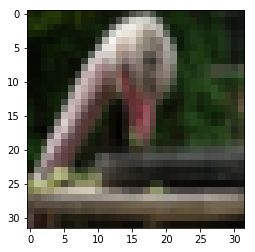

In [47]:
display_img(batch_1, 400)

In [48]:
k = 1
x = batch_1[b"data"]
y = batch_1[b"labels"]
clf = neighbors.KNeighborsClassifier(k, weights="uniform", algorithm='brute')
#clf = MLPClassifier()
clf.fit(x,y)


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

[[ 1544.37850298   682.04930642   181.4471991 ]
 [ 2260.59059489   828.1515315   -789.70020223]
 [-2018.90502025  1504.71757077 -1492.5971405 ]
 ...
 [ 1869.61618004   810.72724951  1020.70453689]
 [ 1246.68492627  2132.01209867  -876.25273889]
 [  405.50351888  -884.76884868    77.76258921]]


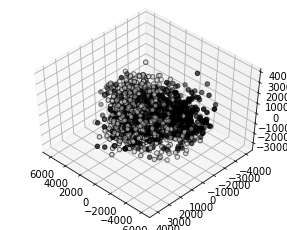

In [19]:
#PCA
X = numpy.array(batch_1[b"data"])
Y = numpy.array(batch_1[b"labels"])
mask = Y < 2
y_bar = Y[mask]
x_bar = X[mask]
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(x_bar)
x_bar = pca.transform(x_bar)
print(x_bar)
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x_bar[:, 0], x_bar[:, 1], x_bar[:, 2], c=y_bar, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.show()

4
prediction [0]
(array([[2690.71031514, 2691.19936088, 2720.79639077, 2737.25081058,
        2779.06980841, 2798.02662603, 2822.88239217, 2824.43215532,
        2828.39654221, 2829.65333566]]), array([[4868, 8588, 6826, 5633, 8474, 7730, 7477, 7868, 9078, 1759]]))


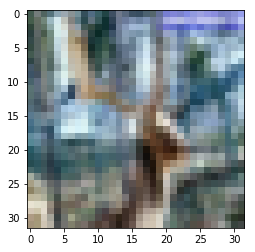

In [49]:
n = 300
img = batch_2[b"data"][n]
prediction = clf.predict(img.reshape((1,-1)))
display_img(batch_2,n)
print("prediction {}".format(prediction))
print(clf.kneighbors(img.reshape((1,-1)), 10))

In [5]:
predictions = clf.predict(batch_2[b"data"])
tps = predictions == batch_2[b"labels"]
tps.sum()/10000

NameError: name 'clf' is not defined

In [ ]:
#knearest algo 